# Ciência de Dados para Previsão de Vendas com Campanhas Publicitárias

## Entendo a Situação

O desafio consiste em prever as vendas de uma empresa fictícia chamada Hashtag com base nos investimentos que ela pretende realizar com publicidade na TV, no  jornal e no rádio.

## Base de Dados

A base deste projetos está disponivel neste link do Google Drive:

  * https://drive.google.com/file/d/1SkpWM5jRJeXZ-wfVWB7JedxjCVBV_mAC/view?usp=sharing

## Bibliotecas Usadas

Estas são as bibliotecas usadas neste projeto:

  * Pandas
  * Numpy
  * Openpyxl
  * Jupyter
  * Matplotlib
  * Seaborn
  * Scikit-Learn

## Divisaõ do Problema

  1. Entender o desafio
  2. Entender a área/empresa
  3. Extrair os dados
  4. Tratar os dados(limpeza)
  5. Fazer uma Análise Exploratória dos dados
  6. Modelar e criar algoritmos
  7. Interpretar os resultados

## Importações

In [30]:
# Importar o pandas com o apelido pd
import pandas as pd

# Bibliotecas para a visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

## Importar os Dados


In [31]:
# Importa a base de dados
df_vendas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analise de Dados/Previsão de Vendas/advertising.csv', sep=',')

# Exibe o Dataframe
df_vendas

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Observações:
  * Os valores investidos em anúncios foram registrados como milhares de reais.
  * Os valores de vendas foram registrados como milhões de reais.

## Tratar os Dados


In [32]:
# Exibe um resumo do dataframe
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


De acordo com o resumo obtido com **df_vendas.info()**, nossa base de dados está limpa.

## Fazer Análise Exploratória

  * Nesta etapa, vamos visualizar como as informações estão distribuídas e a correlação entre elas.
  * Desejamos descobrir se o total de vendas aumenta toda vez que investimos num determinado tipo de anúncio.
  * Além disso, queremos descobrir qual é o tipo de anúncio que tem maior potencial para alavancar as vendas.

In [33]:
# Exibe a correlação entre as colunas da tabela
display(df_vendas.corr())

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


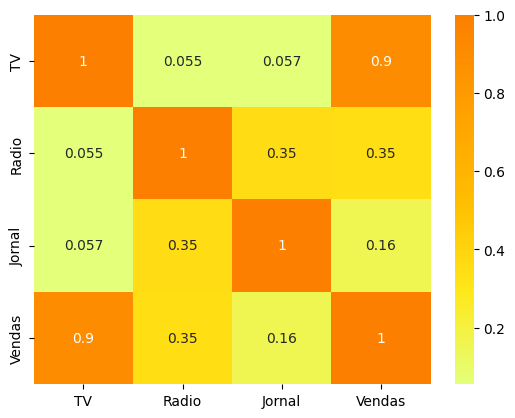

In [34]:
# Cria o gráfico (mapa de calor) para visualizarmos a correlação entre as colunas
sns.heatmap(df_vendas.corr(), cmap='Wistia', annot=True)

# Exibe o gráfico
plt.show()

## Criação de Modelo com Machine Learning

### Separando os Dados de Treino e Dados de Teste

  * **x**: valores investidos em anúncios
    * **df_vendas[['TV, 'Radio', 'Jornal']]**
  * **Y**: Total de vendas
    * **df_vendas['Vendas']**

In [35]:
# Importa um submódulo do sckit-learn
from sklearn.model_selection import train_test_split

# Valores a serem previstos
y = df_vendas['Vendas']

# Valores usados como base para previsão
x = df_vendas[['TV', 'Radio', 'Jornal']]

# Divisão de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

## Escolha do Modelo

Temos em mãos um problema de regressão; vamos usar os seguintes modelos:
  * Regressão Linear
  * RandomForest(Árvore de Decisão)

In [36]:
# Importa o modelo de IA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Cria a IA
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()

# Treina a IA
modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisao.fit(x_treino, y_treino)

RandomForestRegressor()

## Teste de IA e Avaliação do Melhor Modelo

Vamos usar o R²  para avaliar a qualidade de nosso modelo.

In [37]:
from sklearn.metrics import r2_score

# Faz previsões
previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

#Compara as previções com os valores de y_teste
print(f'Pontuação do modelo de regressão linear: {r2_score(y_teste, previsao_regressao_linear)}')
print(f'Pontuação do modelo de árvore de decisão: {r2_score(y_teste, previsao_arvore_decisao)}')

Pontuação do modelo de regressão linear: 0.8808638793887096
Pontuação do modelo de árvore de decisão: 0.9408601979621581


Com base nas pontuações dos dois modelos, concluímos que o **modelo de árvore de decisão** é o melhor.

## Visualização Gráfica das Previsões

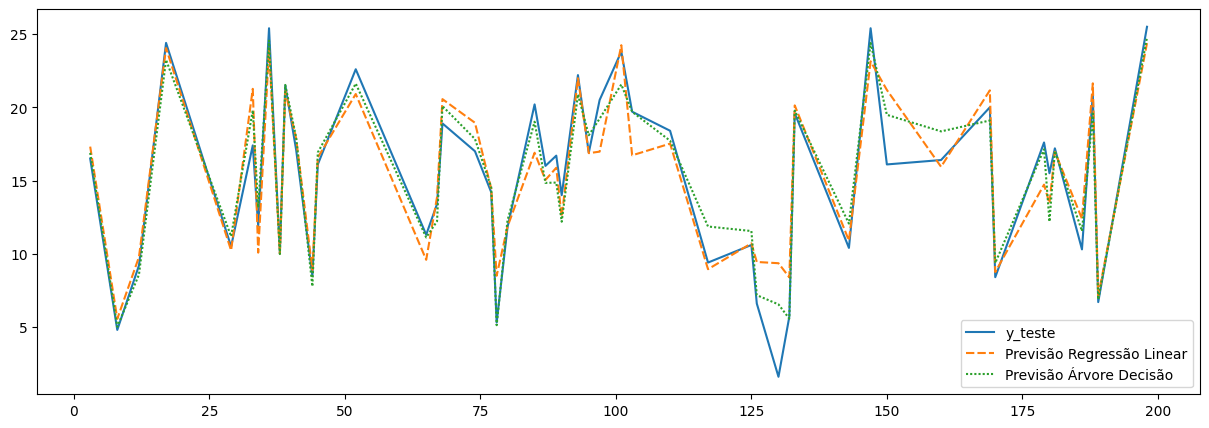

In [38]:
# Cria um dataframe vasio
tabela_aux = pd.DataFrame()

# Cria uma coluna com os valores de teste
tabela_aux['y_teste'] = y_teste

# Cria uma coluna com os valores de previsão de venda, dados pelo modelo de regressão linear
tabela_aux['Previsão Regressão Linear'] = previsao_regressao_linear

# Cria uma coluna com os valores de previsão de venda, dados pelo modelo de árvore de decisão
tabela_aux['Previsão Árvore Decisão'] = previsao_arvore_decisao

# Cria uma figura com  15 inches por 5 inches
plt.figure(figsize=(15,5))

# Cria um gráfico de linha a partir do dataframe
sns.lineplot(data=tabela_aux)

# Exibe o Gráfico
plt.show()

## Fazendo Previsões

In [39]:
# importa a base com três opções de investimentos
df_opcoes_investimentos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analise de Dados/Previsão de Vendas/novos.csv', sep=',')
df_opcoes_investimentos

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [40]:
# Faz uma nova previsão a partir da tabela de opções de investimentos
previsao = modelo_arvore_decisao.predict(df_opcoes_investimentos)
print(previsao)

[ 7.436  8.294 20.923]
